In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\Machine Learning Projects\JamboreeEducation-LinearRegression\Jamboree_Admission.csv",low_memory=False)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# check the Dataset Size
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# check the missing values in dataset
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# check the duplicates in Dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
# statstcal summary of numerical columns
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Exploratoty Data Analysis

#### Univariate Analysis

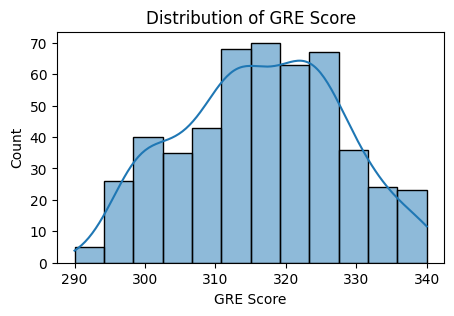

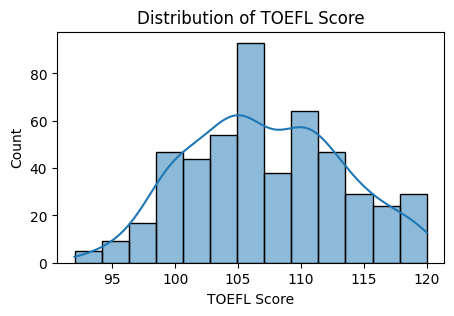

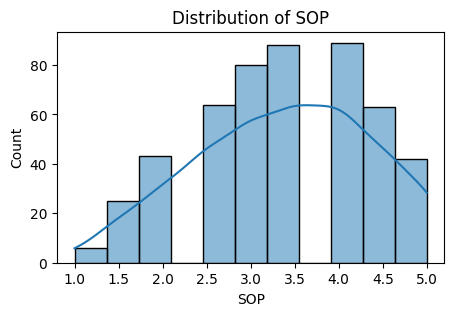

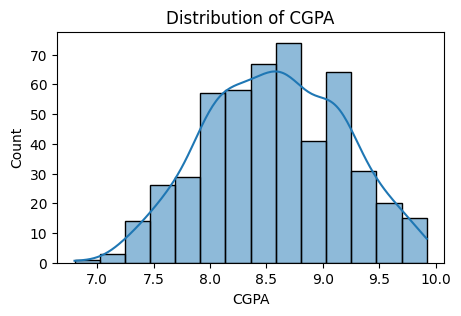

In [ ]:
# Analysis on numerical columns
numerical_cols = ['GRE Score','TOEFL Score','SOP','LOR','CGPA','Chance of Admit']

# plot the histogram for each numerical column to understand the distribution.
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(5,3))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

### Numerical Variable Observations

From the above analysis, we can observe that **GRE Score**, **TOEFL Score**, and **CGPA** follow a **normal distribution**, whereas **SOP** shows a **left-skewed distribution**.  
This indicates the presence of **outliers** in the SOP feature, which will be handled in the later sections.


In [17]:
# Analysis on categorical columns
cat_cols = ['University Rating','Research']

# non-graphical analysis
for col in cat_cols:
    if col in df.columns:
        print(df[col].value_counts().sort_index())

University Rating
1     34
2    126
3    162
4    105
5     73
Name: count, dtype: int64
Research
0    220
1    280
Name: count, dtype: int64


###

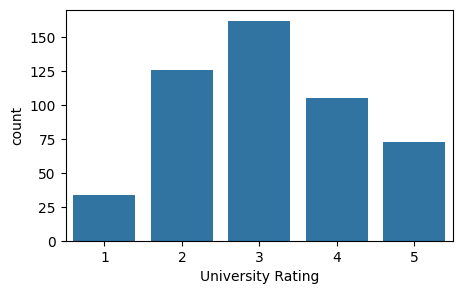

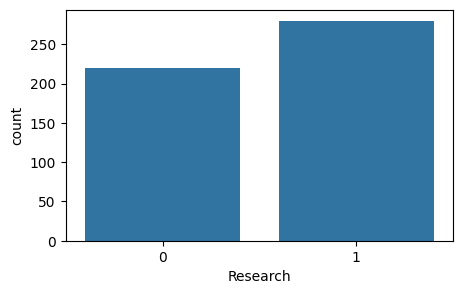

In [18]:
# graphical Analysis
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(5,3))
        sns.countplot(data=df, x=col)
        plt.show()

### Categorical Variable Observations

- The majority of universities have a **rating between 2 and 4**.
- **280 applicants** have **research experience**.
- **220 applicants** do **not** have research experience.
